# 1.	Exploratory Data Analysis (EDA)

In [1]:
#Visualize trends, seasonality, and anomalies in the milk production data.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("monthly_milk_production.csv")

In [3]:
# Rename columns if needed

df.columns = ["Month", "Milk_Production"]

In [4]:
# Convert Month column into datetime format

df["Month"] = pd.to_datetime(df["Month"])
df.set_index("Month", inplace=True)

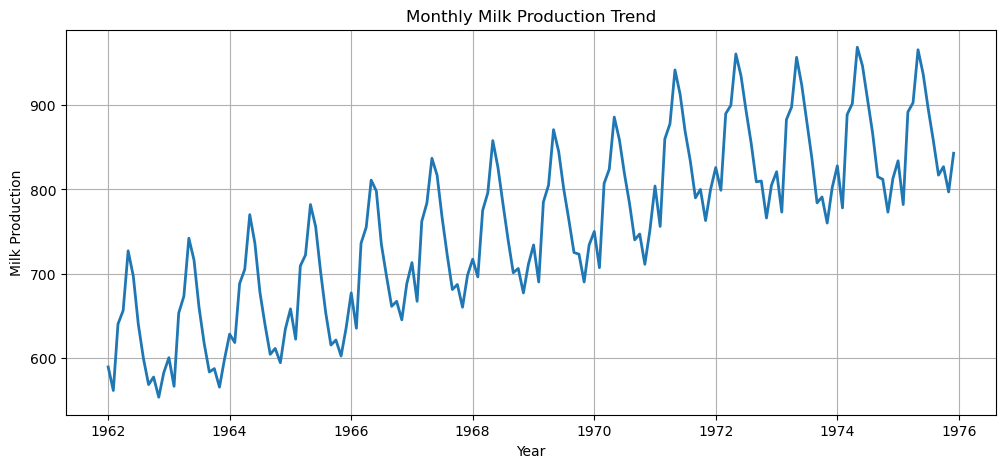

In [5]:
# ---- TREND & SEASONALITY PLOT ----

plt.figure(figsize=(12,5))
plt.plot(df["Milk_Production"], linewidth=2)
plt.title("Monthly Milk Production Trend")
plt.xlabel("Year")
plt.ylabel("Milk Production")
plt.grid(True)
plt.show()

In [6]:
# ---- YEARLY SEASONALITY PLOT ----

df["Year"] = df.index.year
df["Month_Num"] = df.index.month

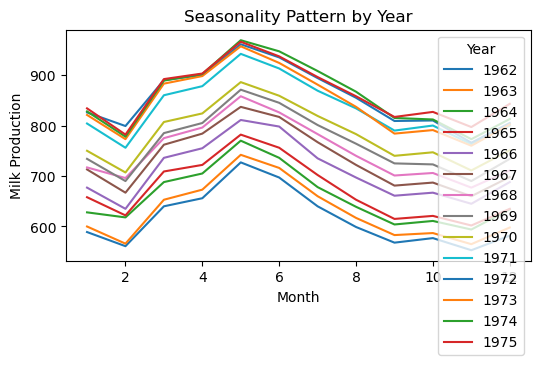

In [7]:
plt.figure(figsize=(6,3))
sns.lineplot(data=df, x="Month_Num", y="Milk_Production", hue="Year", palette="tab10")
plt.title("Seasonality Pattern by Year")
plt.xlabel("Month")
plt.ylabel("Milk Production")
plt.show()

In [8]:
#	Check for any missing values or outliers.

In [9]:
# Check missing values

print("Missing values:\n", df.isnull().sum())

Missing values:
 Milk_Production    0
Year               0
Month_Num          0
dtype: int64


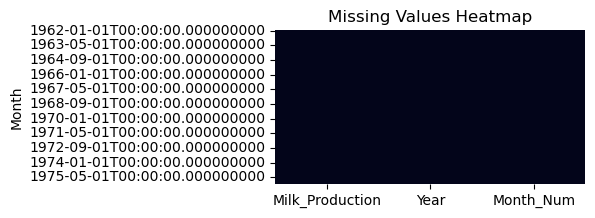

In [10]:
# Optionally visualize

plt.figure(figsize=(4,2))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

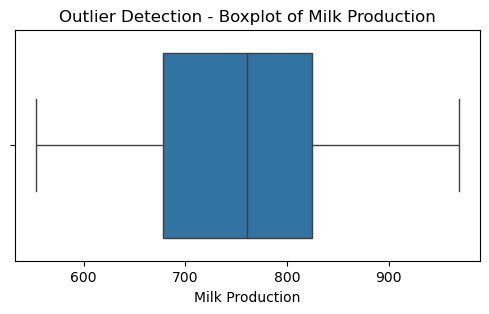

In [11]:
#Check for Outliers

plt.figure(figsize=(6,3))
sns.boxplot(data=df["Milk_Production"], orient="h")
plt.title("Outlier Detection - Boxplot of Milk Production")
plt.xlabel("Milk Production")
plt.show()

In [12]:
# Statistical summary

print(df["Milk_Production"].describe())

count    168.000000
mean     754.708333
std      102.204524
min      553.000000
25%      677.750000
50%      761.000000
75%      824.500000
max      969.000000
Name: Milk_Production, dtype: float64


In [13]:
#Normalize or scale the data for neural network models.

from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[["Milk_Production"]])

In [15]:
# Convert to DataFrame for visibility

scaled_df = pd.DataFrame(scaled_data, index=df.index, columns=["Scaled_Milk_Production"])

In [16]:
print(scaled_df.head())

            Scaled_Milk_Production
Month                             
1962-01-01                0.086538
1962-02-01                0.019231
1962-03-01                0.209135
1962-04-01                0.247596
1962-05-01                0.418269


# 2.	Data Preparation for Deep Learning

In [17]:
#Create input-output sequences (time windows) suitable for training RNNs/LSTMs/GRUs.

import numpy as np

In [18]:
# Convert scaled milk production into a sequence

def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])   # previous 12 months
        y.append(data[i, 0])                 # next month
    return np.array(X), np.array(y)

In [19]:
window_size = 12  # 12 months window
X, y = create_sequences(scaled_data, window_size)

In [20]:
print("Input shape:", X.shape)
print("Output shape:", y.shape)

Input shape: (156, 12)
Output shape: (156,)


In [21]:
# Split data into training, validation, and test sets.

train_size = int(len(X) * 0.70)
val_size = int(len(X) * 0.10)

In [22]:
X_train = X[:train_size]
y_train = y[:train_size]

In [23]:
X_val = X[train_size:train_size + val_size]
y_val = y[train_size:train_size + val_size]

In [24]:
X_test = X[train_size + val_size:]
y_test = y[train_size + val_size:]

In [25]:
print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)

Train size: (109, 12)
Validation size: (15, 12)
Test size: (32, 12)


In [26]:
# Reshape data for model input dimensions.

In [27]:
# Reshaping to 3D format for RNN/LSTM/GRU

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val   = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [28]:
print("Reshaped Training Data:", X_train.shape)
print("Reshaped Validation Data:", X_val.shape)
print("Reshaped Test Data:", X_test.shape)

Reshaped Training Data: (109, 12, 1)
Reshaped Validation Data: (15, 12, 1)
Reshaped Test Data: (32, 12, 1)


# 3.	Model Building

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
from tensorflow.keras.optimizers import Adam

In [30]:
# Hyperparameters

window_size = 12
units = 50
batch_size = 16
epochs = 50
learning_rate = 0.001

In [31]:
# RNN Model

rnn_model = Sequential([
    SimpleRNN(units, activation='tanh', input_shape=(window_size, 1)),
    Dense(1)
])

C:\Users\ptaru\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
rnn_model.compile(optimizer=Adam(learning_rate), loss='mse')

In [33]:
rnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history_rnn = rnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size
)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - loss: 0.0307 - val_loss: 0.0752
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0109 - val_loss: 0.0121
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0059 - val_loss: 0.0228
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0049 - val_loss: 0.0057
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0037 - val_loss: 0.0094
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0031 - val_loss: 0.0062
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0031 - val_loss: 0.0051
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0027 - val_loss: 0.0053
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0025 - val_loss: 0.0075
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0026 - val_loss: 0.0037
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0023 - val_loss: 0.0099
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025 - val_loss: 0.0030


In [35]:
lstm_model = Sequential([
    LSTM(units, input_shape=(window_size, 1)),
    Dense(1)
])

In [36]:
lstm_model.compile(
    optimizer=Adam(learning_rate),
    loss='mse'
)

In [37]:
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
history_lstm = lstm_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - loss: 0.1601 - val_loss: 0.2169
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0542 - val_loss: 0.0356
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0344 - val_loss: 0.0372
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0300 - val_loss: 0.0280
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0253 - val_loss: 0.0402
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0270 - val_loss: 0.0369
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0253 - val_loss: 0.0285
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0247 - val_loss: 0.0255
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0246 - val_loss: 0.0258
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0240 - val_loss: 0.0272
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0239 - val_loss: 0.0282
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0235 - val_loss: 0.0256


In [39]:
gru_model = Sequential([
    GRU(units, input_shape=(window_size, 1)),
    Dense(1)
])

In [40]:
gru_model.compile(
    optimizer=Adam(learning_rate),
    loss='mse'
)

In [41]:
gru_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 50)                  │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,001 (31.25 KB)

 Trainable params: 8,001 (31.25 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
history_gru = gru_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - loss: 0.0997 - val_loss: 0.0972
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0277 - val_loss: 0.0221
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0322 - val_loss: 0.0216
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0237 - val_loss: 0.0387
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0234 - val_loss: 0.0498
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0229 - val_loss: 0.0371
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0209 - val_loss: 0.0263
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0209 - val_loss: 0.0253
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0199 - val_loss: 0.0290
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0196 - val_loss: 0.0323
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0192 - val_loss: 0.0290
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0185 - val_loss: 0.0247


# 4.	Model Evaluation

In [43]:
#Plot predictions vs. actual values.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [44]:
# MAPE function

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [45]:
def evaluate_model(model, X_test, y_test, name):
    # Predict
    pred = model.predict(X_test)

    # Inverse scaling
    pred_inv = scaler.inverse_transform(pred)
    actual_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Metrics
    rmse = np.sqrt(mean_squared_error(actual_inv, pred_inv))
    mae = mean_absolute_error(actual_inv, pred_inv)
    mape_val = mape(actual_inv, pred_inv)

    print(f"\n{name} Model Performance:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE : {mae:.4f}")
    print(f"MAPE: {mape_val:.2f}%")

    # Plot
    plt.figure(figsize=(12, 4))
    plt.plot(actual_inv, label="Actual", linewidth=2)
    plt.plot(pred_inv, label=f"{name} Prediction", linewidth=2)
    plt.title(f"{name} - Actual vs Predicted")
    plt.xlabel("Time")
    plt.ylabel("Milk Production")
    plt.legend()
    plt.grid(True)
    plt.show()

    return rmse, mae, mape_val

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step

RNN Model Performance:
RMSE: 19.5569
MAE : 16.3442
MAPE: 1.88%


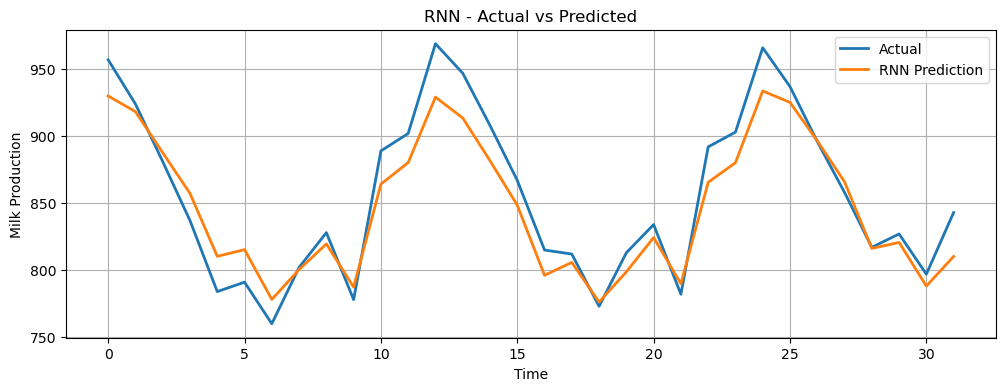

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

LSTM Model Performance:
RMSE: 47.8217
MAE : 40.7157
MAPE: 4.67%


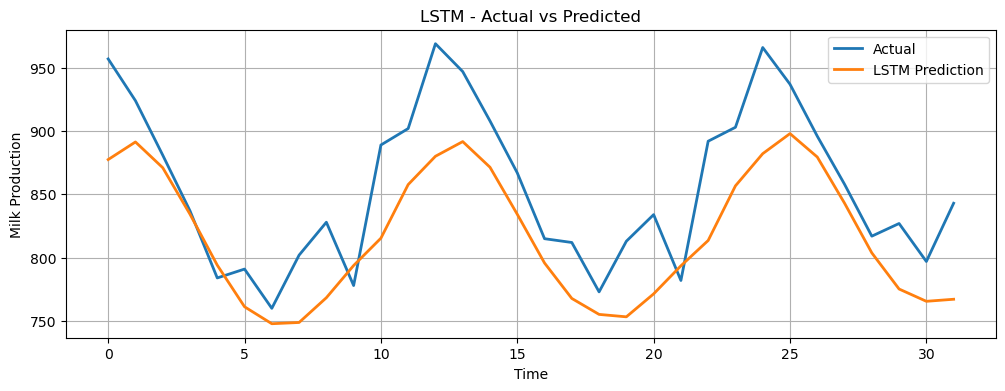

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step

GRU Model Performance:
RMSE: 37.1339
MAE : 30.5018
MAPE: 3.60%


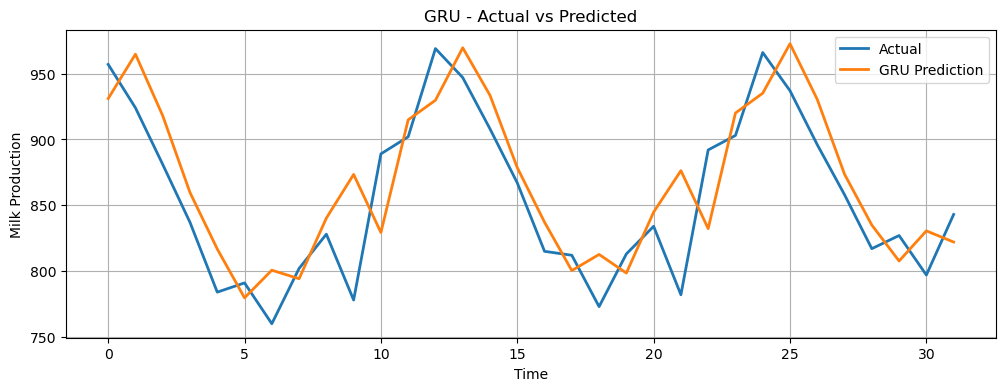

In [46]:
rnn_rmse, rnn_mae, rnn_mape = evaluate_model(rnn_model, X_test, y_test, "RNN")
lstm_rmse, lstm_mae, lstm_mape = evaluate_model(lstm_model, X_test, y_test, "LSTM")
gru_rmse, gru_mae, gru_mape = evaluate_model(gru_model, X_test, y_test, "GRU")

In [47]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["RNN", "LSTM", "GRU"],
    "RMSE": [rnn_rmse, lstm_rmse, gru_rmse],
    "MAE": [rnn_mae, lstm_mae, gru_mae],
    "MAPE (%)": [rnn_mape, lstm_mape, gru_mape]
})

print("\nComparison of Model Performance:")
print(results)


Comparison of Model Performance:
  Model       RMSE        MAE  MAPE (%)
0   RNN  19.556925  16.344215  1.877270
1  LSTM  47.821667  40.715731  4.668027
2   GRU  37.133868  30.501831  3.603126


# 5.	Prediction and Visualization

In [48]:
#Forecast milk production for the next 12 months.

def forecast_future(model, last_sequence, months=12):
    seq = last_sequence.copy()
    predictions = []

    for _ in range(months):
        pred = model.predict(seq.reshape(1, window_size, 1))
        predictions.append(pred[0, 0])

        # slide window
        seq = np.append(seq[1:], pred[0, 0])

    predictions = np.array(predictions).reshape(-1, 1)
    return scaler.inverse_transform(predictions)

In [49]:
# last window from scaled data

last_sequence = scaled_data[-window_size:]

In [50]:
future_12_lstm = forecast_future(lstm_model, last_sequence, months=12)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [51]:
print("\nForecasted Milk Production for Next 12 Months (LSTM):")
print(future_12_lstm)


Forecasted Milk Production for Next 12 Months (LSTM):
[[787.4744 ]
 [786.228  ]
 [811.0491 ]
 [827.7088 ]
 [843.83167]
 [842.0067 ]
 [830.41376]
 [813.6093 ]
 [796.08246]
 [785.6588 ]
 [773.123  ]
 [770.36334]]


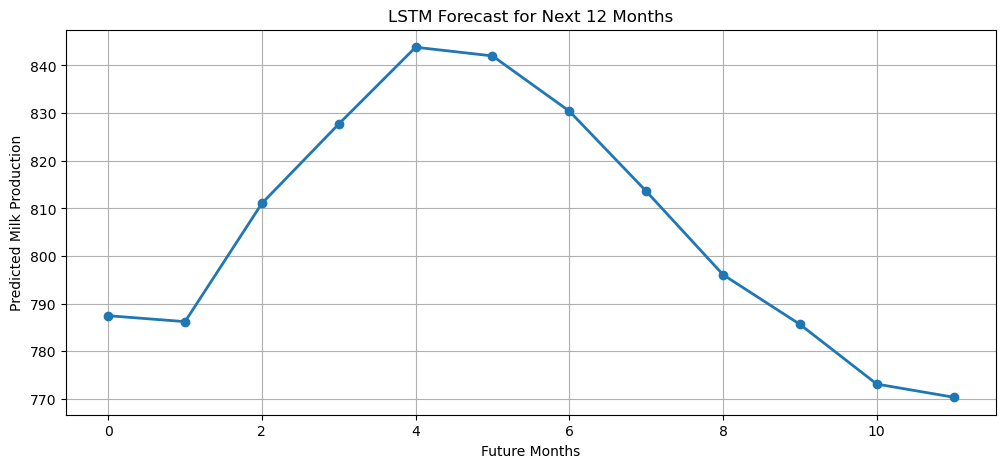

In [52]:
#Visualization of Future Trend

plt.figure(figsize=(12,5))
plt.plot(future_12_lstm, marker='o', linewidth=2)
plt.title("LSTM Forecast for Next 12 Months")
plt.xlabel("Future Months")
plt.ylabel("Predicted Milk Production")
plt.grid(True)
plt.show()

In [53]:
import numpy as np

In [54]:
def forecast_with_uncertainty(model, last_sequence, n_simulations=50, months=12):
    simulations = []

    for _ in range(n_simulations):
        seq = last_sequence.copy() + np.random.normal(0, 0.01, size=last_sequence.shape)
        preds = []

        for _ in range(months):
            pred = model.predict(seq.reshape(1, window_size, 1))
            preds.append(pred[0,0])
            seq = np.append(seq[1:], pred[0,0])

        simulations.append(preds)

    simulations = np.array(simulations)

    # Convert back to original scale
    simulations_inv = scaler.inverse_transform(simulations)

    mean_forecast = simulations_inv.mean(axis=0)
    lower_bound = np.percentile(simulations_inv, 5, axis=0)
    upper_bound = np.percentile(simulations_inv, 95, axis=0)

    return mean_forecast, lower_bound, upper_bound


mean_forecast, lower_ci, upper_ci = forecast_with_uncertainty(
    lstm_model, last_sequence, n_simulations=50, months=12
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━

In [55]:
# Plot with Confidence Intervals

plt.figure(figsize=(12,6))

months = np.arange(1, 13)

<Figure size 1200x600 with 0 Axes>

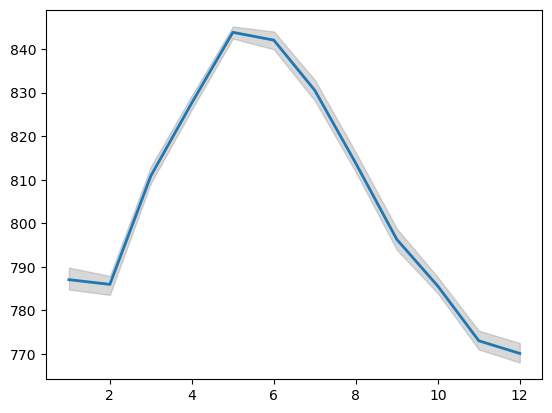

In [56]:
plt.plot(months, mean_forecast, label="Mean Forecast", linewidth=2)
plt.fill_between(months, lower_ci, upper_ci, color='gray', alpha=0.3,
                 label="90% Confidence Interval")

In [57]:
print(mean_forecast)
print(lower_ci)
print(upper_ci)

[787.063   785.97437 810.88336 827.65393 843.81274 842.02435 830.4885
 813.7381  796.28986 785.5851  773.03076 770.12854]
[784.792   783.562   809.1848  826.1226  842.3861  839.9141  828.11584
 811.73425 793.8871  783.9251  771.0293  768.05536]
[789.8296  787.9278  813.0331  829.3841  845.157   844.00354 832.89307
 816.2459  798.7811  787.6137  775.3594  772.52106]


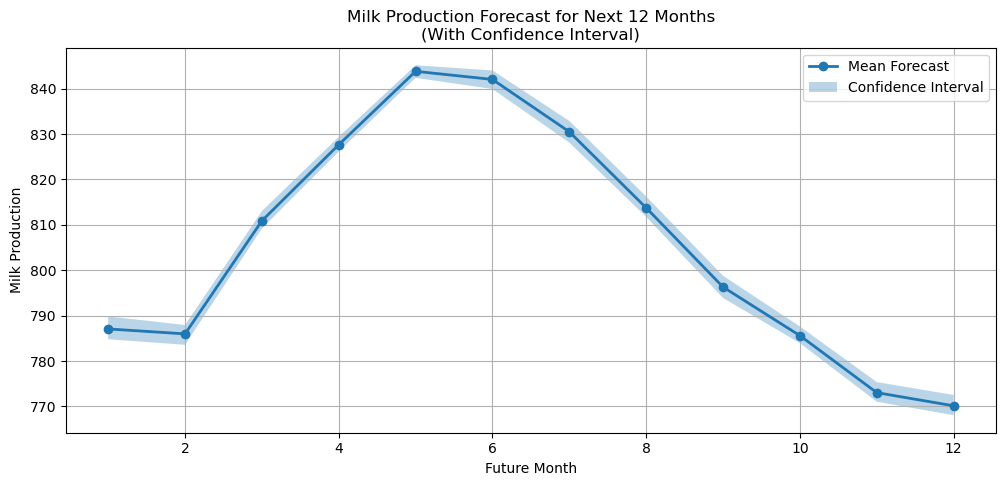

In [58]:
# Visualization with Confidence Interval

future_months = np.arange(1, 13)

plt.figure(figsize=(12, 5))

# Mean forecast line
plt.plot(
    future_months,
    mean_forecast,
    marker='o',
    linewidth=2,
    label="Mean Forecast"
)

# Confidence interval shading
plt.fill_between(
    future_months,
    lower_ci,
    upper_ci,
    alpha=0.3,
    label="Confidence Interval"
)

plt.title("Milk Production Forecast for Next 12 Months\n(With Confidence Interval)")
plt.xlabel("Future Month")
plt.ylabel("Milk Production")
plt.legend()
plt.grid(True)
plt.show()

# 6.	Business Insights

1. Better Production Planning -

The predicted milk production for the next 12 months helps the dairy business:

Anticipate seasonal peaks and low-production months.

Reduce underproduction risks by increasing supply (feed, staff, resources) before peak demand periods.

Avoid overproduction during low-demand seasons, minimizing wastage.

2. Optimized Supply Chain & Distribution -

Accurate forecasts ensure:

Efficient transport scheduling and route planning.

Better inventory management of milk and milk-derived products (cheese, butter, yogurt).

Aligning production with market demand, reducing storage costs and spoilage.

3. Workforce & Labor Management -


The business can adjust workforce allocation based on expected production:

Increase staffing during high-output months.

Schedule maintenance or staff leave during predicted low-production months.

Reduce labor overload by smoothing out operational bottlenecks.

4. Resource Allocation & Cost Reduction -

Forecasts support:

Efficient planning of raw materials such as cattle feed, fodder, medicine, and storage capacity.

Reduction of unnecessary operational expenses during low-production periods.

Strategic investments in cold-storage or transport only when truly needed.

5. Strategic Decision-Making & Expansion Planning -

The business can use long-term production trends to:

Decide whether to increase livestock capacity.

Assess feasibility of entering new markets or launching new dairy products.

Plan capital expenditures such as adding new dairy units, cooling tanks, or vehicles.

6. Improved Revenue Forecasting -

By combining production predictions with market pricing:

The dairy can forecast monthly and annual revenue.

Better budget planning and financial forecasting become possible.

Helps management avoid financial risks during low production periods.

7. Risk Management -

With confidence intervals (uncertainty ranges):

Management can prepare backup strategies for worst-case scenarios (lower bound).

Explore opportunities during best-case predictions (upper bound).

Helps build resilient future plans considering variability in production. 